In [114]:
%matplotlib notebook
%matplotlib inline

In [115]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import time
from datetime import datetime
import collections
import matplotlib.pyplot as plt
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [116]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [117]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [118]:
date = datetime.strftime(datetime.now(), "%m/%d/%Y")

In [119]:
target_users = ("abcnews", "CNN", "CBS", "nytimes", "BBC", "NPR")
# target_users = ("FoxNews", "CNN", "CBS", "nytimes", "BBC")

sentiments = {}

for user in target_users:
    d = {f"compound_{user}": [],
         f"pos_{user}": [],
         f"neg_{user}": [],
         f"neu_{user}": [],
         f"tweet_{user}": [],
         f"tweet_time_{user}": [],
         f"tweet_ago_{user}": []}
    sentiments.update(d)

In [120]:
# Get 100 tweets for each news network  
for target_user in target_users:
    
    public_tweets = [] 

    for page_num in range(1, 6):
        tweets = api.user_timeline(target_user, page=page_num, type='recent')
        public_tweets += tweets
        
    number_of_tweets = len(public_tweets)
    
    for num in range(number_of_tweets):   
        tweet = public_tweets[num]
        tweet_time = datetime.strptime(tweet['created_at'], "%a %b %d %H:%M:%S %z %Y")
       
        # Calculate the time between the two tweets
        if num == (number_of_tweets - 1): # for the last tweet
            tweet_ago = 0 
        else:
            previous_tweet = public_tweets[num+1]
            previous_tweet_time = datetime.strptime(previous_tweet['created_at'], "%a %b %d %H:%M:%S %z %Y")
            tweet_ago = round((tweet_time - previous_tweet_time).seconds/60, 2) # in minutes
        
        # Run Vader Analysis on tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"] * -1
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        tweet = tweet["text"]

        # Add each value to the sentiments
        sentiments[f"compound_{target_user}"].append(compound)
        sentiments[f"pos_{target_user}"].append(pos)
        sentiments[f"neg_{target_user}"].append(neg)
        sentiments[f"neu_{target_user}"].append(neu)
        sentiments[f"tweet_{target_user}"].append(tweet)
        sentiments[f"tweet_time_{target_user}"].append(tweet_time)
        sentiments[f"tweet_ago_{target_user}"].append(tweet_ago)

print("done")    

done


In [151]:
sentiments_df = pd.DataFrame(sentiments)
sentiments_df.to_csv("sentiments.csv", encoding='utf-8', index=False)

In [122]:
sentiments_df.head()

,compound_abcnews,pos_abcnews,neg_abcnews,neu_abcnews,tweet_abcnews,tweet_time_abcnews,tweet_ago_abcnews,compound_CNN,pos_CNN,neg_CNN,...,tweet_BBC,tweet_time_BBC,tweet_ago_BBC,compound_NPR,pos_NPR,neg_NPR,neu_NPR,tweet_NPR,tweet_time_NPR,tweet_ago_NPR
0,0.0000,0.000,-0.000,1.000,#ANALYSIS: Trump's former lawyer delivers cine...,2019-02-27 23:26:15+00:00,3.10,0.0000,0.000,-0.000,...,Have you caught the the new series of #TopGear...,2019-02-27 20:01:08+00:00,60.08,0.0000,0.000,-0.000,1.000,Watch: NPR's Brian Naylor on why Michael Cohen...,2019-02-27 23:25:00+00:00,5.00
1,0.6369,0.318,-0.000,0.682,'The love of my life': Kerri-Anne Kennerley's ...,2019-02-27 23:23:09+00:00,15.68,0.0000,0.000,-0.000,...,If you missed #InsideTheFactory last night on ...,2019-02-27 19:01:03+00:00,59.93,0.1779,0.206,-0.136,0.658,Leaders of the United Methodist Church have re...,2019-02-27 23:20:00+00:00,19.00
2,-0.6249,0.000,-0.313,0.687,Captured Indian pilot becomes human face of Ka...,2019-02-27 23:07:28+00:00,11.43,-0.3400,0.093,-0.155,...,"Rolls, cobs, barms, teacakes... what do you ca...",2019-02-27 18:01:07+00:00,0.00,0.2382,0.098,-0.000,0.902,"Then-President Obama called Germany ""one of ou...",2019-02-27 23:01:00+00:00,10.65
3,0.4019,0.209,-0.000,0.791,‘A bit extreme': Data shows staggering number ...,2019-02-27 22:56:02+00:00,0.00,0.0000,0.000,-0.000,...,The Underwater Photographer of the Year award ...,2019-02-27 18:01:07+00:00,53.40,0.0000,0.000,-0.000,1.000,We have deleted an earlier video tweet that in...,2019-02-27 22:50:21+00:00,10.35
4,-0.7845,0.000,-0.330,0.670,Government names and shames institutions yet t...,2019-02-27 22:56:02+00:00,42.50,0.6705,0.297,-0.000,...,"RT @bbcpress: ""I'm going to go travelling with...",2019-02-27 17:07:43+00:00,6.68,0.0000,0.000,-0.000,1.000,Donald Trump's former lawyer Michael Cohen was...,2019-02-27 22:40:00+00:00,17.00


In [123]:
sentiments_df.shape

(100, 42)

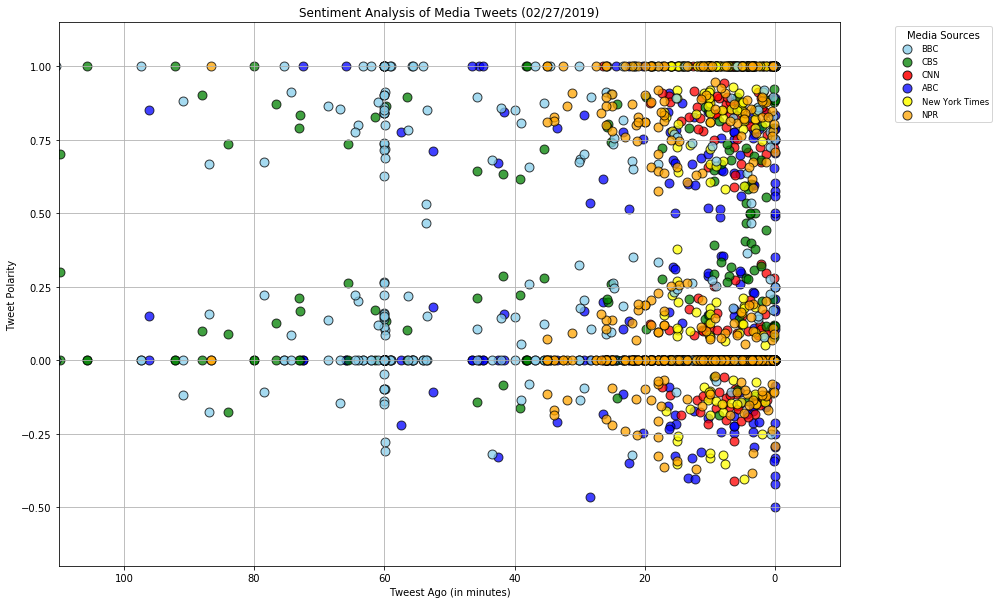

In [145]:
# Plot the sentimental Analysis
plt.figure(figsize=(14,10))

plt.xlim(110, -10)
plt.ylim(-0.7, 1.15)
plt.grid(True)

plt.title(f"Sentiment Analysis of Media Tweets ({date})")
plt.xlabel("Tweest Ago (in minutes)")
plt.ylabel("Tweet Polarity")

target_users_with_colors = {"abcnews": "blue", "CNN": "red", "CBS": "green", "nytimes": "yellow", "BBC": "skyblue", "NPR": "orange"}

for key, value in target_users_with_colors.items():
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"pos_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"neg_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"neu_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")
    
# Create dummy objects for legend
h1 = plt.scatter([-0.1], [0], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75, label="BBC")
h2 = plt.scatter([-0.1], [0], marker="o", facecolors="green", edgecolors="black", alpha=0.75, label="CBS")
h3 = plt.scatter([-0.1], [0], marker="o", facecolors="red", edgecolors="black", alpha=0.85, label="CNN")
h4 = plt.scatter([-0.1], [0], marker="o", facecolors="blue", edgecolors="black", alpha=0.75, label="ABC")
h5 = plt.scatter([-0.1], [0], marker="o", facecolors="yellow", edgecolors="black", alpha=0.85, label="New York Times")
h6 = plt.scatter([-0.1], [0], marker="o", facecolors="orange", edgecolors="black", alpha=0.75, label="NPR")

# Set legend
legend = plt.legend(handles=[h1, h2, h3, h4, h5, h6], markerscale=1.5, title="Media Sources", bbox_to_anchor=(1.2, 1), fontsize='small', fancybox=True)

# Save plot to file
filename = "sentiment_analysis.png"
plt.savefig(filename, bbox_inches='tight')

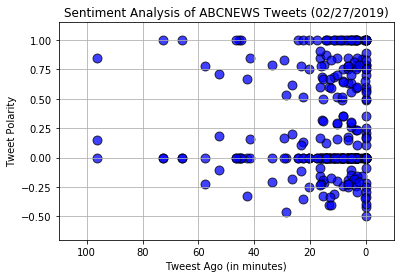

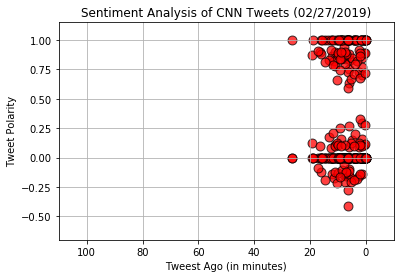

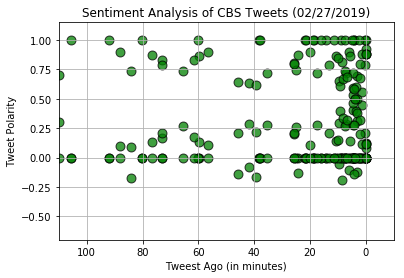

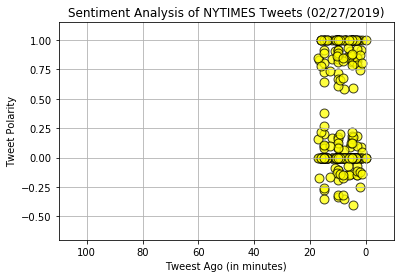

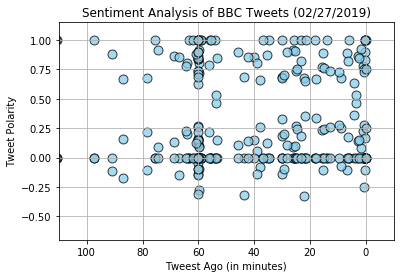

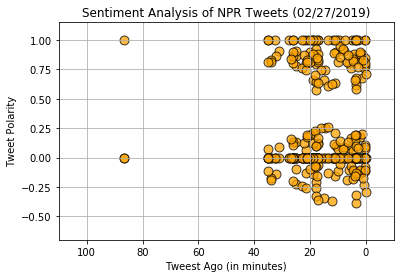

In [139]:
# plt.figure(figsize=(12,10))

# plt.xlim(110, -10)
# plt.ylim(-0.7, 1.15)
# plt.grid(True)

# plt.title(f"Sentiment Analysis of Media Tweets ({date})")
# plt.xlabel("Tweest Ago (in minutes)")
# plt.ylabel("Tweet Polarity")

target_users_with_colors = {"abcnews": "blue", "CNN": "red", "CBS": "green", "nytimes": "yellow", "BBC": "skyblue", "NPR": "orange"}

for key, value in target_users_with_colors.items():
    plt.figure(figsize=(6,4))

    plt.xlim(110, -10)
    plt.ylim(-0.7, 1.15)
    plt.grid(True)

    plt.title(f"Sentiment Analysis of {key.upper()} Tweets ({date})")
    plt.xlabel("Tweest Ago (in minutes)")
    plt.ylabel("Tweet Polarity")
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"pos_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"neg_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"neu_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")

In [146]:
# Calculate compound mean for each news network
overall_sentimental = {}
for user in target_users:
    if user == "abcnews":
        user1 = "ABC"
    elif user == "nytimes":
        user1 = "NYT"
    else:
        user1 = user
    overall_sentimental[f"{user1}"] = round(sentiments_df[f"compound_{user}"].mean(),2)
overall_sentimental

{'ABC': -0.1,
 'CNN': -0.02,
 'CBS': 0.33,
 'NYT': -0.06,
 'BBC': 0.25,
 'NPR': -0.05}

In [147]:
# overall_sentimental = collections.OrderedDict(sorted(overall_sentimental.items(), key=lambda t: t[0]))
# dict(overall_sentimental)

In [148]:
overall_sentimental = dict((sorted(overall_sentimental.items(), key=lambda x: x[1], reverse=True)))

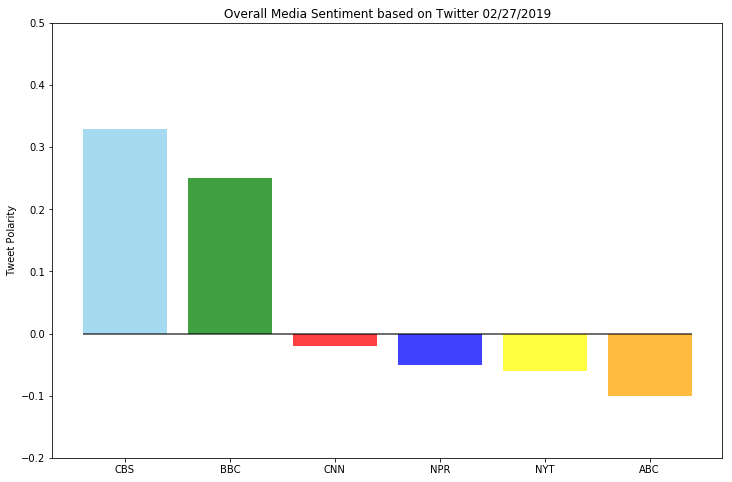

In [149]:
# Plot
plt.figure(figsize=(12,8))
columns = list(overall_sentimental.keys())
average_compound = list(overall_sentimental.values())

# plt.ylim(-min(average_compound) - 0.05, max(average_compound) + 0.05)
plt.ylim(-0.2, 0.5)
x_axis = np.arange(len(columns))
y_axis = list(overall_sentimental.values())

plt.title(f"Overall Media Sentiment based on Twitter {date}")
plt.ylabel("Tweet Polarity")

plt.hlines(y=0, xmin=-0.4, xmax=5.4, alpha=0.75)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, columns)

colors = ["skyblue", "green", "red", "blue", "yellow", "orange"]

for i in range(len(x_axis)):
    plt.bar(x_axis[i], y_axis[i], color=colors[i], alpha=0.75, align="center")
    
# Save plot to file
filename = "overall.png"
plt.savefig(filename, bbox_inches='tight')

plt.show()